In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


**`Linear Regression`**

In [ ]:
bike_sharing_data = {
    'Temperature': [20.2, 22.1, 18.5, 21.7, 19.8, 23.4, 21.0, 20.5, 22.3, 19.6],
    'Humidity': [0.65, 0.72, 0.55, 0.68, 0.61, 0.75, 0.70, 0.67, 0.73, 0.60],
    'Wind Speed': [5.2, 4.8, 6.1, 3.9, 5.6, 4.2, 4.5, 5.0, 4.6, 6.3],
    'Rentals': [180, 210, 150, 240, 190, 270, 220, 200, 230, 170]
}

# Create DataFrame
df = pd.DataFrame(bike_sharing_data)

# Save DataFrame to CSV in Google Drive
df.to_csv('/content/drive/My Drive/Files/bike_sharing_data.csv', index=False)

print("Data saved to bike_sharing_data.csv in Google Drive")


Data saved to bike_sharing_data.csv in Google Drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Files/bike_sharing_data.csv')
df
df = pd.DataFrame(bike_sharing_data)
# Define rental categories based on the number of rentals
def categorize_rentals(rentals):
    if rentals < 180:
        return "Low"
    elif 180 <= rentals < 220:
        return "Medium"
    else:
        return "High"

# Apply the categorization function
df['Rental Category'] = df['Rentals'].apply(categorize_rentals)

# Display the updated DataFrame
print(df)

   Temperature  Humidity  Wind Speed  Rentals Rental Category
0         20.2      0.65         5.2      180          Medium
1         22.1      0.72         4.8      210          Medium
2         18.5      0.55         6.1      150             Low
3         21.7      0.68         3.9      240            High
4         19.8      0.61         5.6      190          Medium
5         23.4      0.75         4.2      270            High
6         21.0      0.70         4.5      220            High
7         20.5      0.67         5.0      200          Medium
8         22.3      0.73         4.6      230            High
9         19.6      0.60         6.3      170             Low


In [ ]:
from sklearn.model_selection import train_test_split

updated_bike_sharing_data = x_train, x_test, y_train, y_test = train_test_split(df['Temperature'], df['Rentals'], test_size=0.2, random_state=40)
updated_bike_sharing_data

[8    22.3
 1    22.1
 2    18.5
 9    19.6
 0    20.2
 5    23.4
 7    20.5
 6    21.0
 Name: Temperature, dtype: float64,
 4    19.8
 3    21.7
 Name: Temperature, dtype: float64,
 8    230
 1    210
 2    150
 9    170
 0    180
 5    270
 7    200
 6    220
 Name: Rentals, dtype: int64,
 4    190
 3    240
 Name: Rentals, dtype: int64]

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'Temperature', 'Humidity', 'Wind Speed', and 'Rentals' columns

# Select features for the model
features = ['Temperature', 'Humidity', 'Wind Speed']  # Include all relevant features

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[features], df['Rentals'], test_size=0.2, random_state=40)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)  # Train on all selected features

# Get user input for temperature, humidity, and wind speed
temperature = float(input("Enter the temperature (in degrees Celsius): "))
humidity = float(input("Enter the humidity (between 0 and 1): "))
wind_speed = float(input("Enter the wind speed (in meters per second): "))

# Predict the number of rentals based on user input
# Create a DataFrame for the input data to match the training data format
input_data = pd.DataFrame([[temperature, humidity, wind_speed]], columns=features)
predicted_rentals = linear_model.predict(input_data)[0]

# Round the predicted rentals to the nearest integer
predicted_rentals = round(predicted_rentals)

# Print the predicted number of rentals
print("Predicted Number of Rentals:", predicted_rentals)

Enter the temperature (in degrees Celsius): 20.2
Enter the humidity (between 0 and 1): 0.65
Enter the wind speed (in meters per second): 5.2
Predicted Number of Rentals: 189


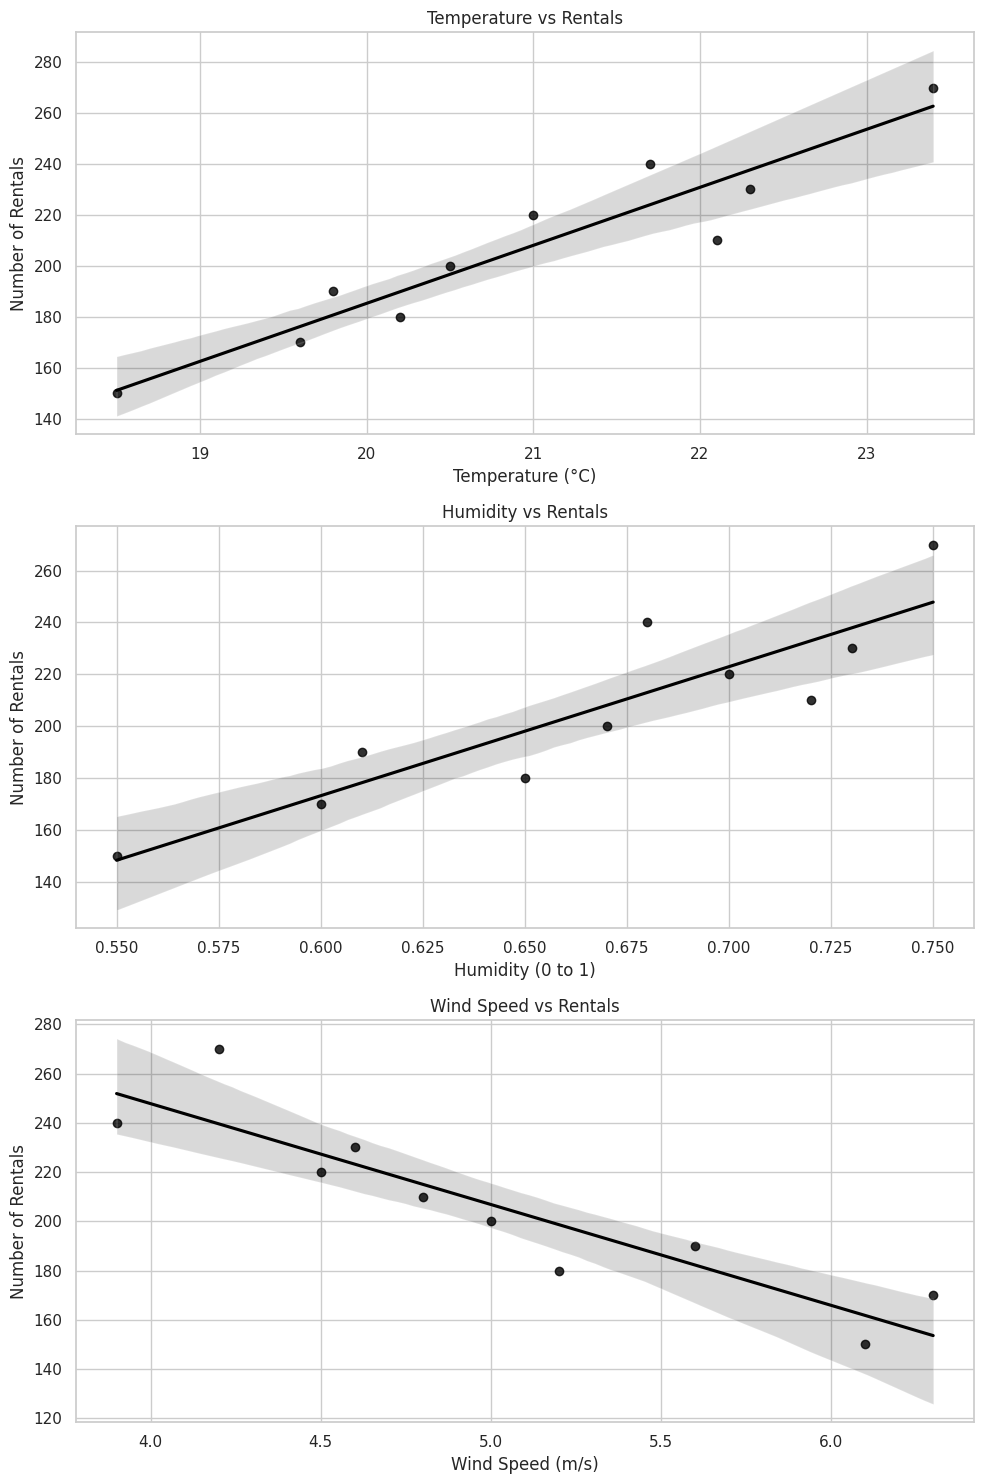

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Scatter plot for Temperature vs Rentals
sns.regplot(x='Temperature', y='Rentals', data=df, ax=axs[0], color='black')
axs[0].set_title('Temperature vs Rentals')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Number of Rentals')

# Scatter plot for Humidity vs Rentals
sns.regplot(x='Humidity', y='Rentals', data=df, ax=axs[1], color='black')
axs[1].set_title('Humidity vs Rentals')
axs[1].set_xlabel('Humidity (0 to 1)')
axs[1].set_ylabel('Number of Rentals')

# Scatter plot for Wind Speed vs Rentals
sns.regplot(x='Wind Speed', y='Rentals', data=df, ax=axs[2], color='black')
axs[2].set_title('Wind Speed vs Rentals')
axs[2].set_xlabel('Wind Speed (m/s)')
axs[2].set_ylabel('Number of Rentals')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**`Logestic regression`**

In [ ]:
import pandas as pd

customer_data = {
    'Age': [22, 25, 47, 35, 26, 50, 23, 45, 33, 36],
    'Income': [15000, 18000, 50000, 45000, 22000, 60000, 19000, 55000, 32000, 48000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Purchased': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1]  # 0 = No purchase, 1 = Purchase
}

# Create DataFrame
df = pd.DataFrame(customer_data)
# Save DataFrame to CSV in Google Drive
df.to_csv('/content/drive/My Drive/Files/customer_data.csv', index=False)

print("Data saved to customer_data.csv in Google Drive")


Data saved to customer_data.csv in Google Drive


In [ ]:
X = df[['Income']]
y = df['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get user input for age
income = int(input("Enter the income: "))

# Predict if a person of the given age will purchase the product
prediction = logistic_model.predict([[income]])[0]

# Print the prediction
if prediction == 1:
    print("The person will purchase the product.")
else:
    print("The person will not purchase the product.")


Enter the income: 10000
The person will purchase the product.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


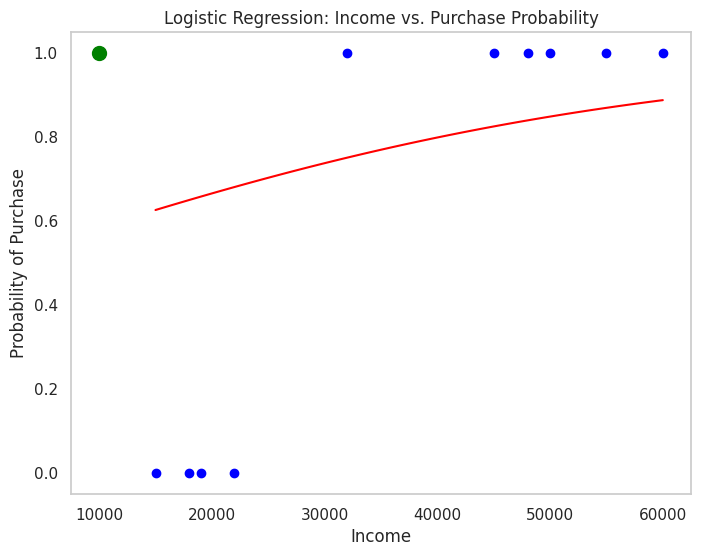

In [ ]:
# Plot

# Visualize the logistic regression curve
X_range = np.linspace(df['Income'].min() - 5, df['Income'].max() + 5, 100).reshape(-1, 1)
y_prob = logistic_model.predict_proba(X_range)[:, 1]  # Probability of purchase

plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Purchased'], color='blue', label='Data Points')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel('Income')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression: Income vs. Purchase Probability')
plt.grid(False)

# Mark the user input Income and its prediction on the plot
plt.scatter(income, prediction, color='green', marker='o', s=100, label='User Input')

plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: Use

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



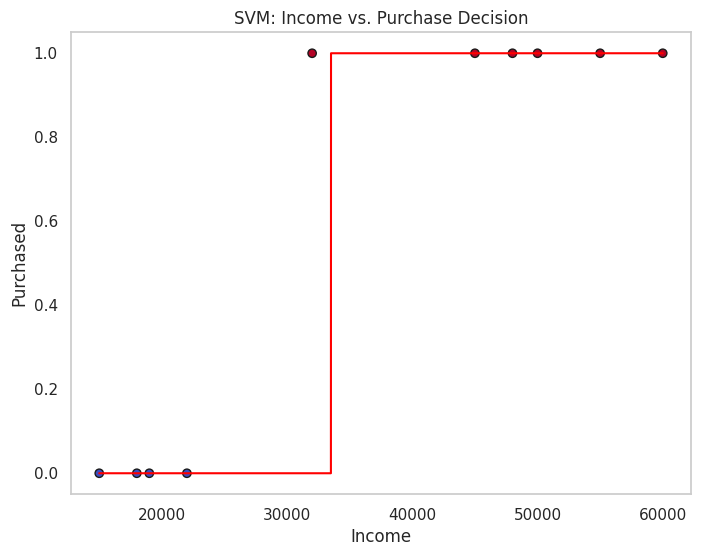

In [ ]:

#Support Vector Machines (SVM)  using dictionary dataset  buying on Income wise, classification, report  , plot

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Sample dataset (replace with your own data)
data = {'Income': [15000, 18000, 50000, 45000, 22000, 60000, 19000, 55000, 32000, 48000],
        'Purchased': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1]}

df = pd.DataFrame(data)

# Split data into features (X) and target variable (y)
X = df[['Income']]
y = df['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot

# Create a meshgrid to plot decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X['Income'].min() - 5, X['Income'].max() + 5
xx = np.arange(x_min, x_max, h)  # Only generate x-axis values for Income

# Predict on the meshgrid (use xx.reshape(-1, 1) to make it a 2D array)
Z = svm_model.predict(xx.reshape(-1, 1))

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.scatter(X['Income'], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.plot(xx, Z, color='red')  # Plot the decision boundary as a line
plt.xlabel('Income')
plt.ylabel('Purchased')
plt.title('SVM: Income vs. Purchase Decision')
plt.grid( False)
plt.show()



**`Decison Tree Classifier`**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

feedbacks = [
    "The food was delicious and well presented",  # Positive
    "I really enjoyed the flavors of the dishes",  # Positive
    "The meal was fantastic and service was great",  # Positive
    "The food was not good at all",                  # Negative
    "I didn't like the taste of my dish",           # Negative
    "The meal was bland and unappetizing",          # Negative
    "Amazing flavors and excellent portion sizes",   # Positive
    "Not worth the price",                           # Negative
    "A wonderful dining experience",                 # Positive
    "A complete disappointment"                      # Negative
]

# Labels: 1 for positive, 0 for negative
labels = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(feedbacks).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Function to predict sentiment of user input
def predict_feedback_sentiment(feedbacks):
    new_X = vectorizer.transform(feedbacks).toarray()
    predictions = clf.predict(new_X)
    for feedback, prediction in zip(feedbacks, predictions):
        sentiment = 'Positive' if prediction == 1 else 'Negative'
        print(f'Feedback: "{feedback}" - Sentiment: {sentiment}')

# Input from user
print("Enter restaurant feedback (type 'exit' to finish):")
user_feedbacks = []
while True:
    feedback = input("Feedback: ")
    if feedback.lower() == 'exit':
        break
    user_feedbacks.append(feedback)

# Predict sentiment for user input
if user_feedbacks:
    predict_feedback_sentiment(user_feedbacks)
else:
    print("No feedback entered.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Enter restaurant feedback (type 'exit' to finish):
Feedback: good
Feedback: exit
Feedback: "good" - Sentiment: Negative


**`K Neighbour Classifier`**

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = load_breast_cancer()
X = cancer.data  # Features
y = cancer.target  # Labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get user input for a new sample
print("Enter the feature values for the new sample:")
features = []
for i in range(len(cancer.feature_names)):
    feature_value = float(input(f"{cancer.feature_names[i]}: "))
    features.append(feature_value)

# Create an array for the new sample
new_sample = np.array([features])

# Predict the class of the new sample
predicted_class = knn.predict(new_sample)
print(f'Predicted class for the new sample: {cancer.target_names[predicted_class][0]}')


Accuracy: 0.96
Enter the feature values for the new sample:
mean radius: 0.67
mean texture: 0.45
mean perimeter: 0.8
mean area: 0.56
mean smoothness: 0.73
mean compactness: 0.45
mean concavity: 0.57
mean concave points: 0.34
mean symmetry: 0.58
mean fractal dimension: 0.53
radius error: 0.1
texture error: 0.3
perimeter error: 0.4
area error: 0.4
smoothness error: 0.6
compactness error: 0.45
concavity error: 0.34
concave points error: 0.2
symmetry error: 0.1
fractal dimension error: 0.2
worst radius: 0.3
worst texture: 0.4
worst perimeter: 0.5
worst area: 0.6
worst smoothness: 0.7
worst compactness: 0.4
worst concavity: 0.9
worst concave points: 0.3
worst symmetry: 0.5
worst fractal dimension: 0.3
Predicted class for the new sample: benign
